In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 

In [2]:
train = pd.read_csv('./train.csv')  # 다운받은 csv를 pandas의 DataFrame 형식으로 불러옵니다.
test = pd.read_csv("./test.csv")
submission = pd.read_csv("./sample_submission.csv")

In [3]:
submission = pd.read_csv("./sample_submission.csv")

In [4]:
train.head() # 데이터 상위 5개를 확인합니다.

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,1,M,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,2,I,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,3,I,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,4,M,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,5,I,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6


In [5]:
train.shape # 데이터를 모양을 확인합니다.

(1253, 10)

In [6]:
test.shape

(2924, 9)

In [7]:
submission.shape

(2924, 2)

In [8]:
train.head()

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,1,M,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,2,I,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,3,I,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,4,M,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,5,I,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6


In [9]:
test.head()

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight
0,1,F,0.595,0.470,0.155,1.121,0.4515,0.1780,0.1550
1,2,M,0.580,0.450,0.150,0.927,0.2760,0.1815,0.3600
2,3,I,0.260,0.205,0.070,0.097,0.0415,0.0190,0.0305
3,4,M,0.590,0.460,0.130,1.102,0.4550,0.2055,0.3300
4,5,F,0.595,0.465,0.140,1.113,0.5175,0.2440,0.3050


In [10]:
submission.head()

,id,Target
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [11]:
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['axes.titlecolor'] = 'white'
plt.rcParams['figure.titlesize'] = 30
plt.rcParams["font.family"] = "NanumGothic"


In [12]:
#결측치 있는지 확인하는 함수

def check_missing_col(dataframe):
    
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'총 {missing_values}개의 결측치가 존재합니다.\n')
            missing_col.append([col, dataframe[col].dtype])
    print(f'결측치가 있는 컬럼 의 개수는 {counted_missing_col} 입니다')

    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')

    return missing_col

check_missing_col(train)


결측치가 있는 컬럼 의 개수는 0 입니다
결측치가 존재하지 않습니다


[]

In [13]:
check_missing_col(test)

결측치가 있는 컬럼 의 개수는 0 입니다
결측치가 존재하지 않습니다


[]

In [14]:
train = train.drop(columns=['id'],axis=1) # id 열을 제거해 줍니다.
test = test.drop(columns=['id'],axis=1) # id 열을 제거해 줍니다.

In [15]:
train.head()

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,M,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,I,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,I,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,M,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,I,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6


In [16]:
temp = train['Target'].unique() # Target의 중복되지 않은 값을 출력합니다.
np.sort(temp) # 오름차순으로 정렬합니다.

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 29], dtype=int64)

In [17]:
train.groupby('Target').count().iloc[:,0] # Target 값 별로 데이터의 개수를 세어줍니다.

Target
3       5
4      14
5      37
6      88
7     107
8     174
9     200
10    202
11    141
12     79
13     62
14     42
15     26
16     21
17     13
18     12
19      8
20     11
21      5
22      2
23      3
29      1
Name: Gender, dtype: int64

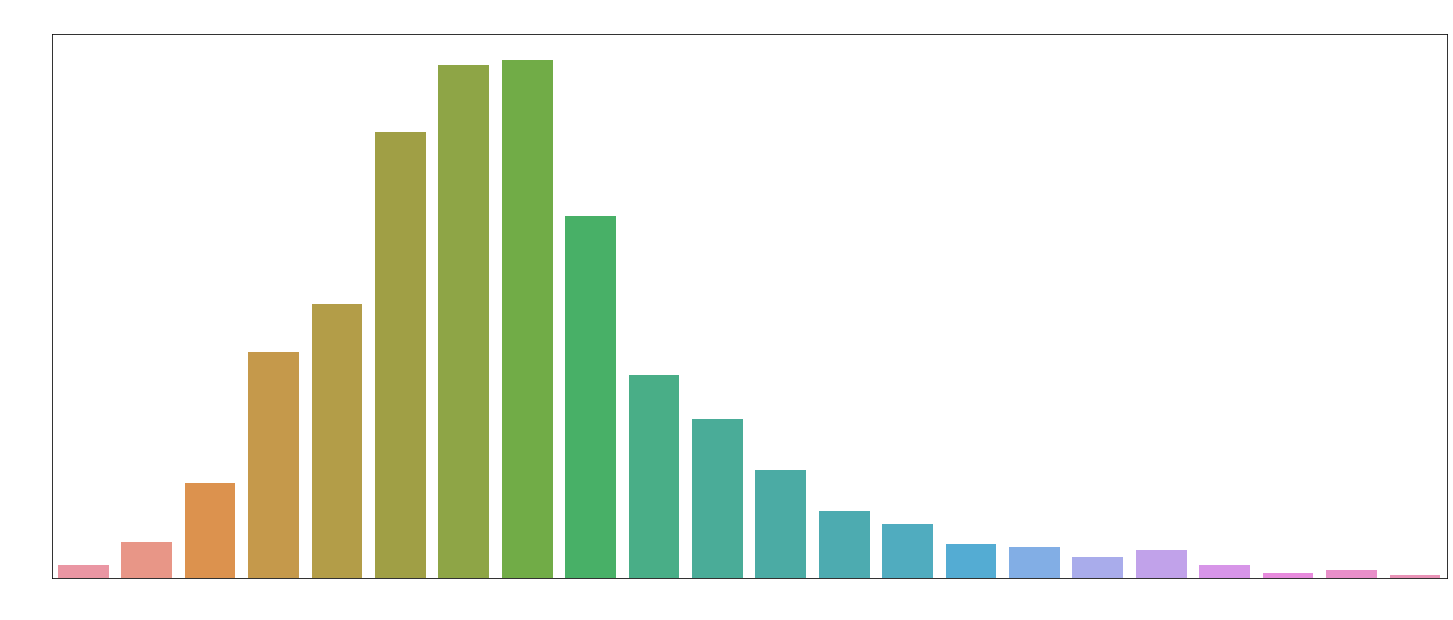

In [18]:
# 전복의 나이 분포 시각화
plt.rcParams["figure.figsize"] = [25,10]
sns.countplot("Target", data = train)
plt.title("전복 나이 별 카운트", fontsize = 30)
plt.xlabel("target(age)", fontsize = 15)
plt.ylabel("count", fontsize = 15)
plt.show()

In [19]:
temp1 = train["Target"] == 29
temp2 = train["Target"] == 23
train[temp1 | temp2] # 가장 나이가 많은 29세와 23세의 데이터 프레임을 합침

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
553,F,0.45,0.380,0.165,0.8165,0.2500,0.1915,0.265,23
762,F,0.70,0.585,0.185,1.8075,0.7055,0.3215,0.475,29
1131,F,0.55,0.415,0.135,0.7750,0.3020,0.1790,0.260,23
1234,F,0.49,0.385,0.150,0.7865,0.2410,0.1400,0.240,23


In [20]:
train[train["Target"] == 3] # 가장 나이가 작은 3세의 데이터 프레임

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
20,M,0.155,0.11,0.040,0.0155,0.0065,0.003,0.005,3
210,I,0.195,0.15,0.045,0.0375,0.0180,0.006,0.011,3
285,I,0.130,0.10,0.030,0.0130,0.0045,0.003,0.004,3
463,I,0.110,0.09,0.030,0.0080,0.0025,0.002,0.003,3
1013,I,0.180,0.13,0.045,0.0275,0.0125,0.010,0.009,3


In [21]:
train["Gender"].value_counts()

M    469
I    404
F    380
Name: Gender, dtype: int64

In [22]:
test["Gender"].value_counts()

M    1059
I     938
F     927
Name: Gender, dtype: int64

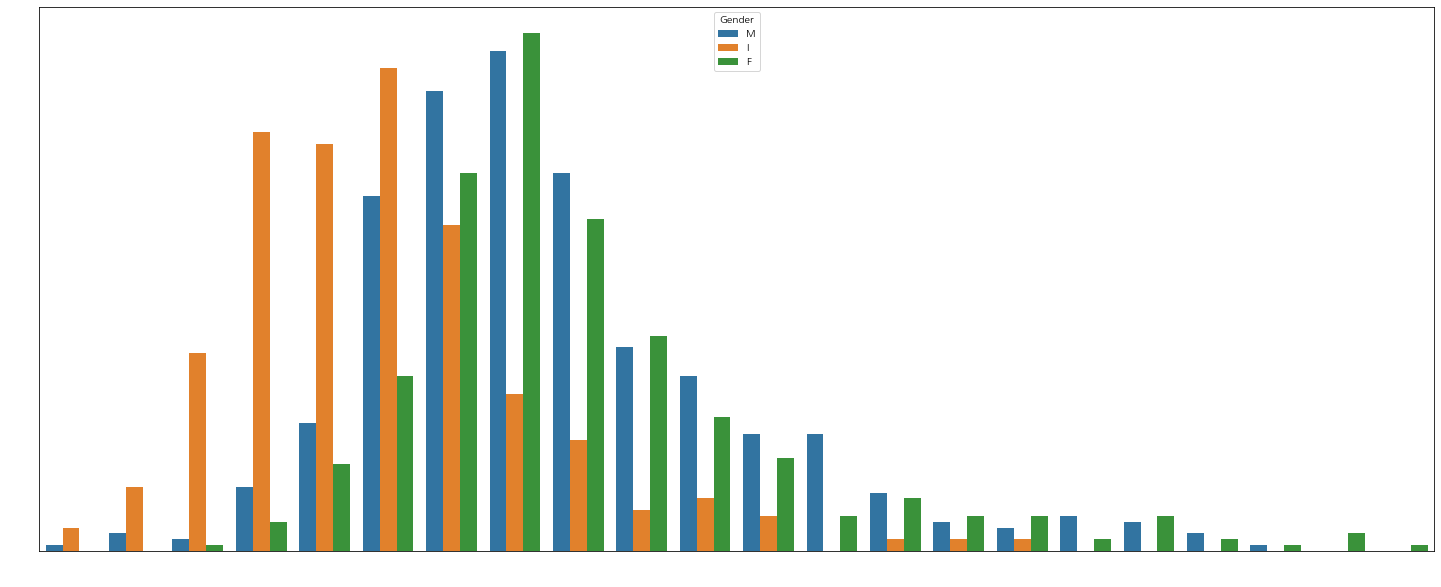

In [24]:
plt.figure(figsize = (25,10))
sns.countplot(x = "Target", hue = "Gender", data = train)
plt.show()

# 데이터 프레임 상으로도 23,29세에 비하여 3세의 전복이 전반적으로 수치가 낮음
# 또한 Gender가 23, 29세인 전복이 모두 F


In [25]:
train.dtypes

Gender             object
Lenght            float64
Diameter          float64
Height            float64
Whole Weight      float64
Shucked Weight    float64
Viscra Weight     float64
Shell Weight      float64
Target              int64
dtype: object

In [26]:
print(train['Gender'].unique()) # Gender의 중복되지 않은 값을 출력합니다.

['M' 'I' 'F']


In [27]:
train.groupby(["Gender"]).count()

,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
Gender,,,,,,,,
F,380,380,380,380,380,380,380,380
I,404,404,404,404,404,404,404,404
M,469,469,469,469,469,469,469,469


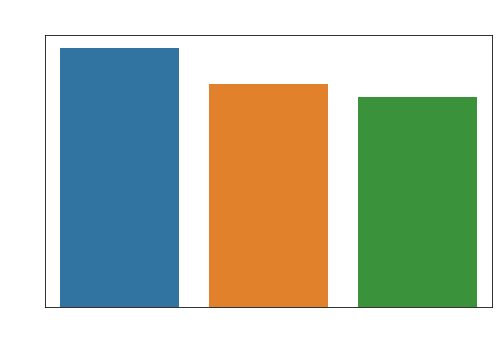

In [28]:
# 성별 데이터 개수 그래프
plt.rcParams["figure.figsize"] = [8,5]
sns.countplot("Gender", data = train)
plt.title("성별 데이터 개수 - train",fontsize=30)
plt.show()

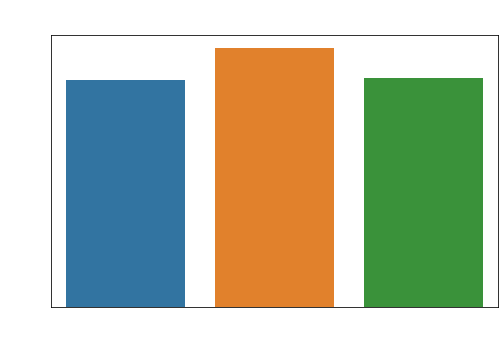

In [29]:
# 성별 데이터 개수 그래프
plt.rcParams["figure.figsize"] = [8,5]
sns.countplot("Gender", data = test)
plt.title("성별 데이터 개수 - test",fontsize=30)
plt.show()

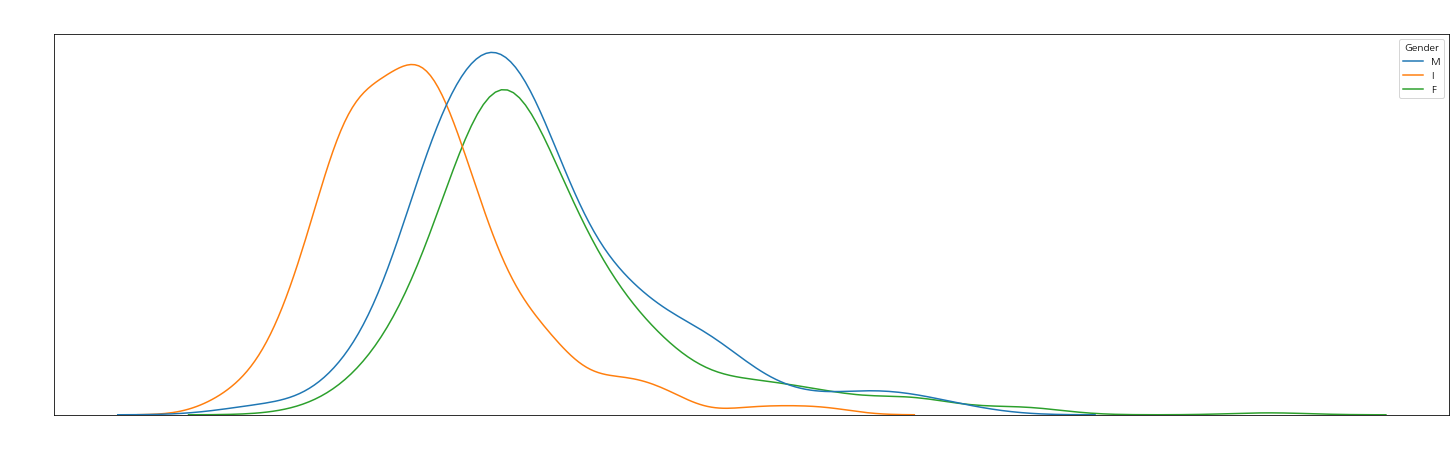

In [30]:
# 성별에 따른 나이 분포 그래프
plt.figure(figsize = (25,7))
sns.kdeplot("Target", hue = "Gender", data= train)
plt.title("성별에 따른 나이 분포", fontsize = 30)
plt.xlabel("target(Age)", fontsize = 15)
plt.ylabel("Density", fontsize = 15)
plt.show()

In [31]:
def corr_heatmap(data):

    # 상관계수그래프
    # 먼저 상관계수 계산을 위해 텍스트 형식의 데이터를 숫자로 변환해줍니다.
    from sklearn.preprocessing import LabelEncoder
    import matplotlib.pyplot as plt
    import numpy as np
    import seaborn as sns

    corr_df = data.copy()
    corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

    # 상관관계 분석도
    plt.figure(figsize=(15,10))

    heat_table = corr_df.corr()
    mask = np.zeros_like(heat_table)
    mask[np.triu_indices_from(mask)] = True
    heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
    heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
    heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
    plt.title('correlation between features', fontsize=40)
    plt.show()

In [32]:
train_pre = train.copy()
test_pre = test.copy()
train_pre = pd.get_dummies(train_pre)
test_pre  = pd.get_dummies(test_pre)

In [33]:
train_pre.columns

Index(['Lenght', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight',
       'Viscra Weight', 'Shell Weight', 'Target', 'Gender_F', 'Gender_I',
       'Gender_M'],
      dtype='object')

In [34]:
train_pre = train_pre[["Gender_F","Gender_I","Gender_M","Lenght","Diameter","Height","Whole Weight","Shucked Weight","Viscra Weight","Shell Weight","Target"]]
test_pre = test_pre[["Gender_F","Gender_I","Gender_M","Lenght","Diameter","Height","Whole Weight","Shucked Weight","Viscra Weight","Shell Weight"]]

# Gender  : 전복 성별
# Length : 전복 길이
# Diameter : 전복 둘레
# Height : 전복 키
# Whole Weight : 전복 전체 무게 
# Shucked Weight : 껍질을 제외한 무게
# Viscra Weight : 내장 무게
# Shell Weight : 껍질 무게

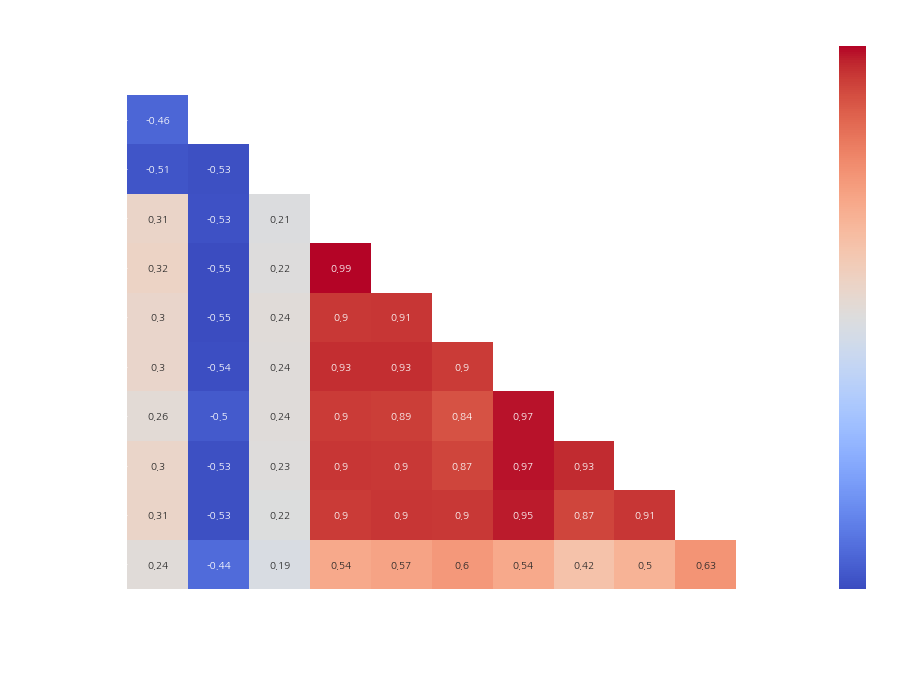

In [35]:
corr_heatmap(train_pre)

In [36]:
train_pre.head()

,Gender_F,Gender_I,Gender_M,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,0,0,1,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,0,1,0,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,0,1,0,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,0,0,1,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,0,1,0,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6


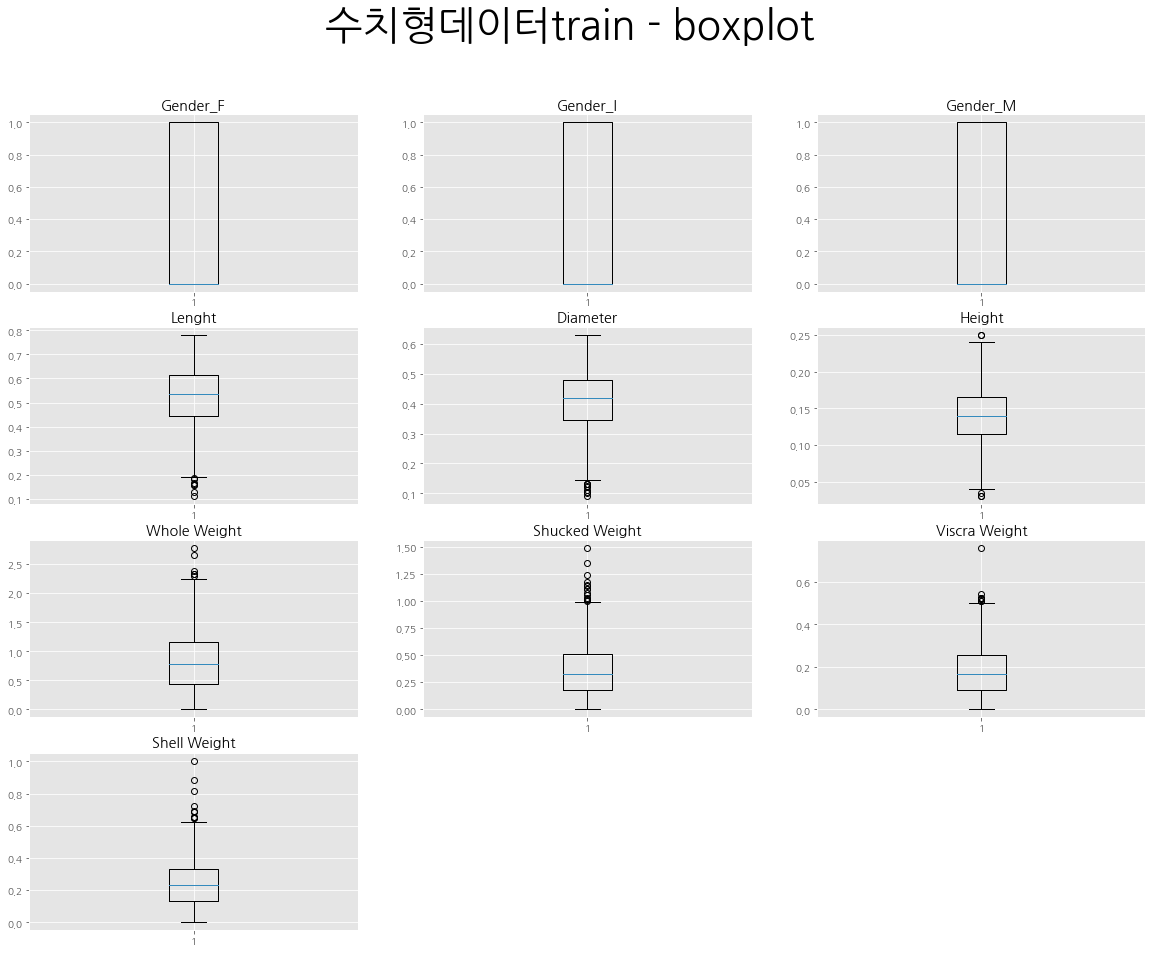

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

feature = ["Gender_F","Gender_I","Gender_M","Lenght","Diameter","Height","Whole Weight","Shucked Weight","Viscra Weight","Shell Weight"]

# Boxplot을 이용해서 데이터의 분포 살펴보기

plt.figure(figsize = (20,15))
plt.suptitle("수치형데이터train - boxplot", fontsize = 40)

for i in range(len(feature)) :
    plt.subplot(4,3,i+1)
    plt.title(feature[i], color = "black")
    plt.boxplot(train_pre[feature[i]])
plt.show()

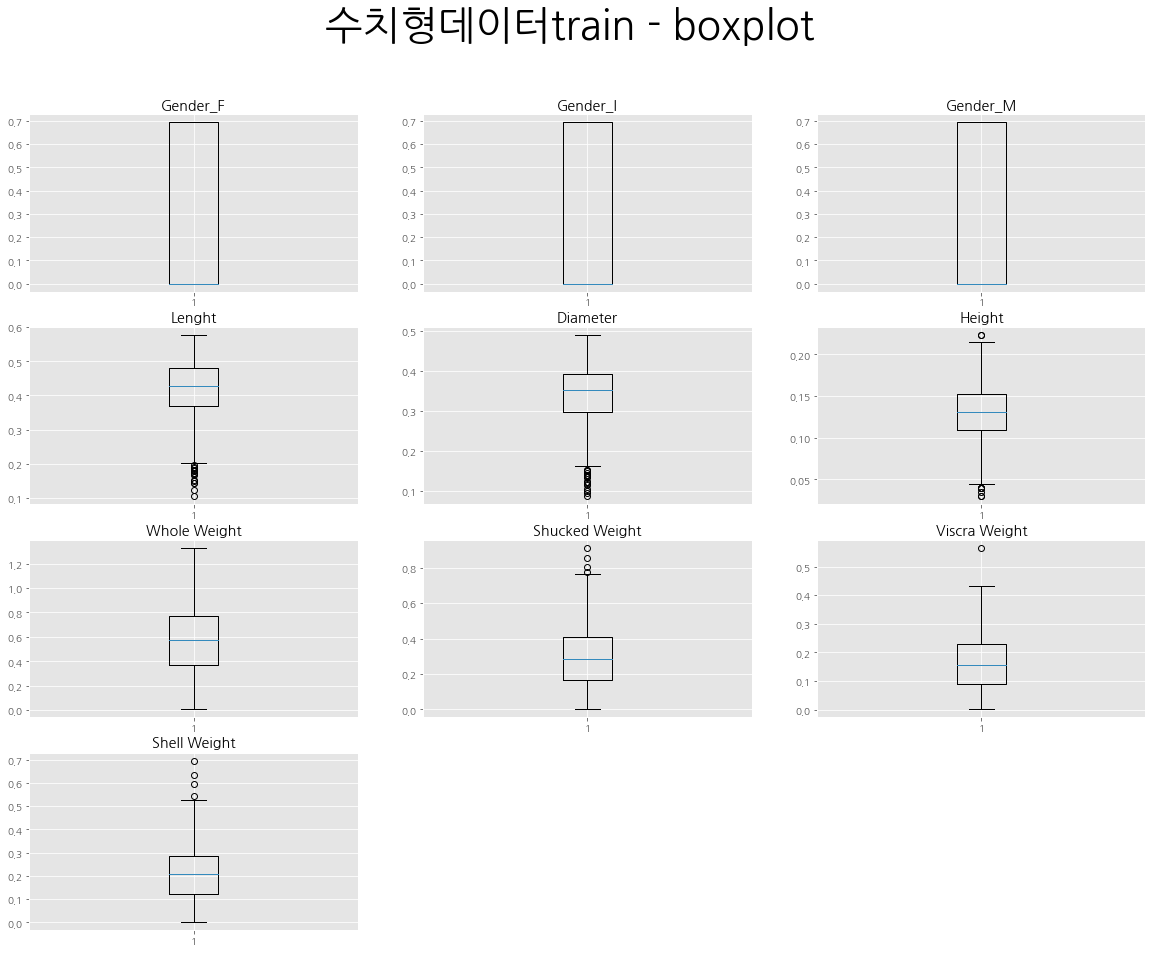

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

feature = ["Gender_F","Gender_I","Gender_M","Lenght","Diameter","Height","Whole Weight","Shucked Weight","Viscra Weight","Shell Weight"]

# Boxplot을 이용해서 데이터의 분포 살펴보기

plt.figure(figsize = (20,15))
plt.suptitle("수치형데이터train - boxplot", fontsize = 40)

for i in range(len(feature)) :
    plt.subplot(4,3,i+1)
    plt.title(feature[i], color = "black")
    plt.boxplot(np.log1p(train_pre[feature[i]]))
plt.show()

## 이변량 분석 - 길이, 둘레, 키, 무게 vs Target

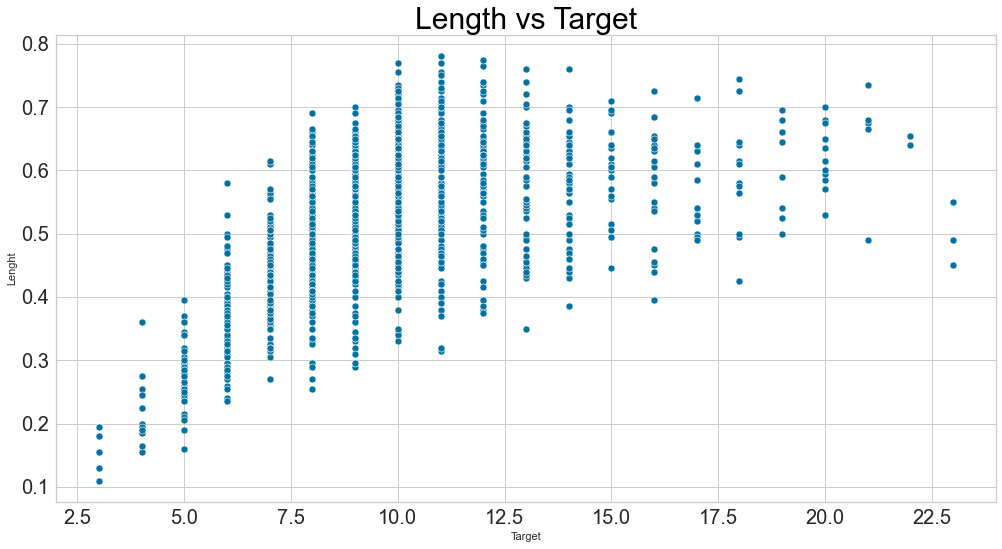

In [126]:
plt.figure(figsize = (15,8))
sns.scatterplot(x = "Target", y = "Lenght", data = train_pre)
plt.title("Length vs Target", size = 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

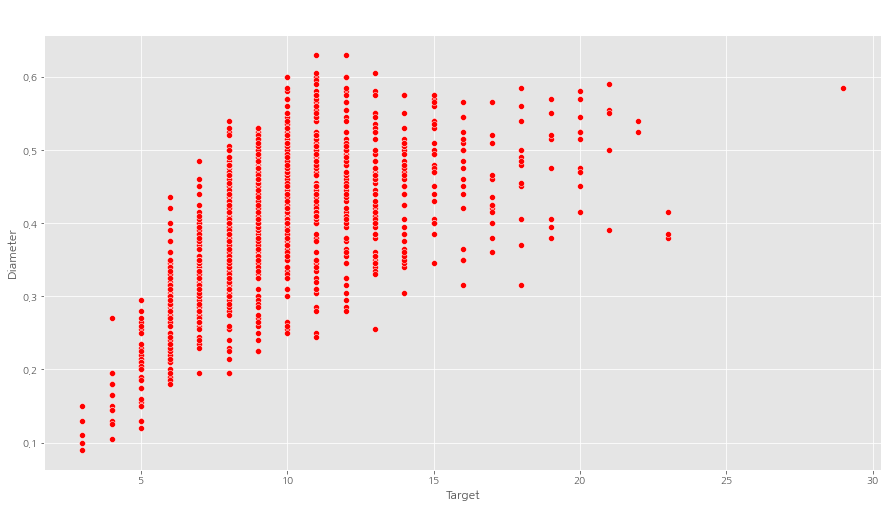

In [40]:
plt.figure(figsize = (15,8))
sns.scatterplot(x = "Target", y = "Diameter", data = train_pre, color = "red")
plt.title("Diameter vs Target", size = 30)
plt.show()

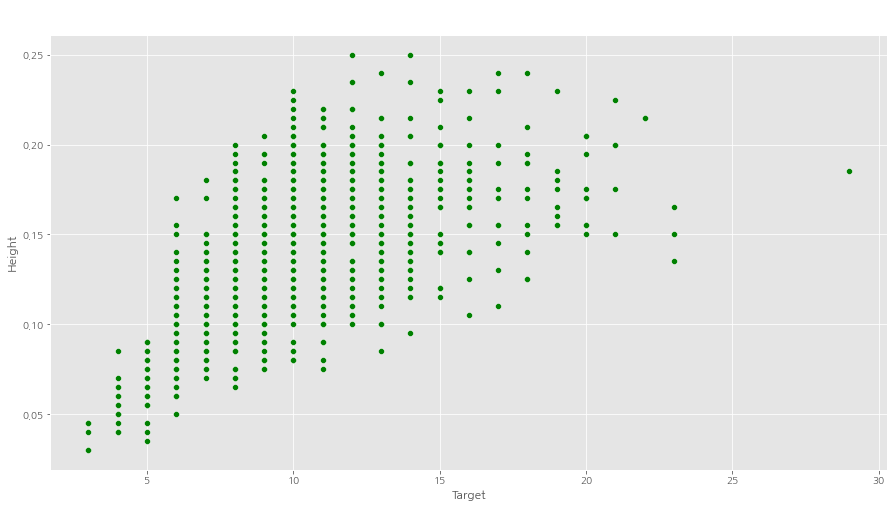

In [41]:
plt.figure(figsize = (15,8))
sns.scatterplot(x = "Target", y = "Height", data = train_pre, color = "green")
plt.title("Height vs Target", size = 30)
plt.show()

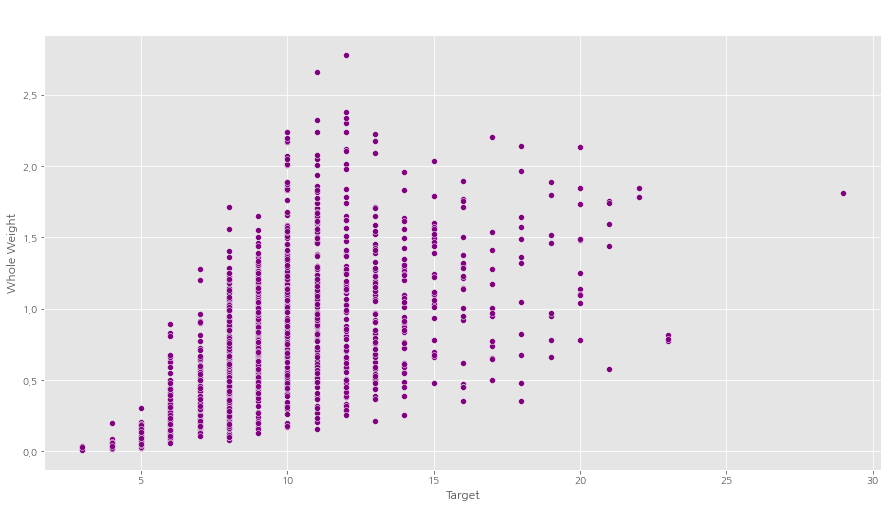

In [42]:
plt.figure(figsize = (15,8))
sns.scatterplot(x = "Target", y = "Whole Weight", data = train_pre, color = "purple")
plt.title("Weight vs Target", size = 30)
plt.show()

In [43]:
train_pre.head()

,Gender_F,Gender_I,Gender_M,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,0,0,1,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,0,1,0,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,0,1,0,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,0,0,1,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,0,1,0,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6


In [44]:
train_pre.groupby(["Target"])[["Lenght","Diameter","Height","Whole Weight"]].min()

,Lenght,Diameter,Height,Whole Weight
Target,,,,
3,0.110,0.090,0.030,0.0080
4,0.155,0.105,0.040,0.0175
5,0.160,0.120,0.035,0.0210
6,0.235,0.180,0.050,0.0580
7,0.270,0.195,0.070,0.1060
8,0.255,0.195,0.065,0.0800
9,0.290,0.225,0.075,0.1240
10,0.330,0.250,0.080,0.1690
11,0.315,0.245,0.075,0.1555


In [45]:
data_description = train.describe()
data_description

,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
count,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000
mean,0.522869,0.406963,0.139545,0.831199,0.358818,0.181006,0.240077,9.912211
std,0.120231,0.099771,0.039033,0.500491,0.224612,0.111936,0.142574,3.214676
min,0.110000,0.090000,0.030000,0.008000,0.002500,0.002000,0.003000,3.000000
25%,0.445000,0.345000,0.115000,0.440500,0.182500,0.092500,0.130000,8.000000
50%,0.535000,0.420000,0.140000,0.777500,0.326000,0.168000,0.230000,10.000000
75%,0.615000,0.480000,0.165000,1.160000,0.505500,0.256500,0.330000,11.000000
max,0.780000,0.630000,0.250000,2.779500,1.488000,0.760000,1.005000,29.000000


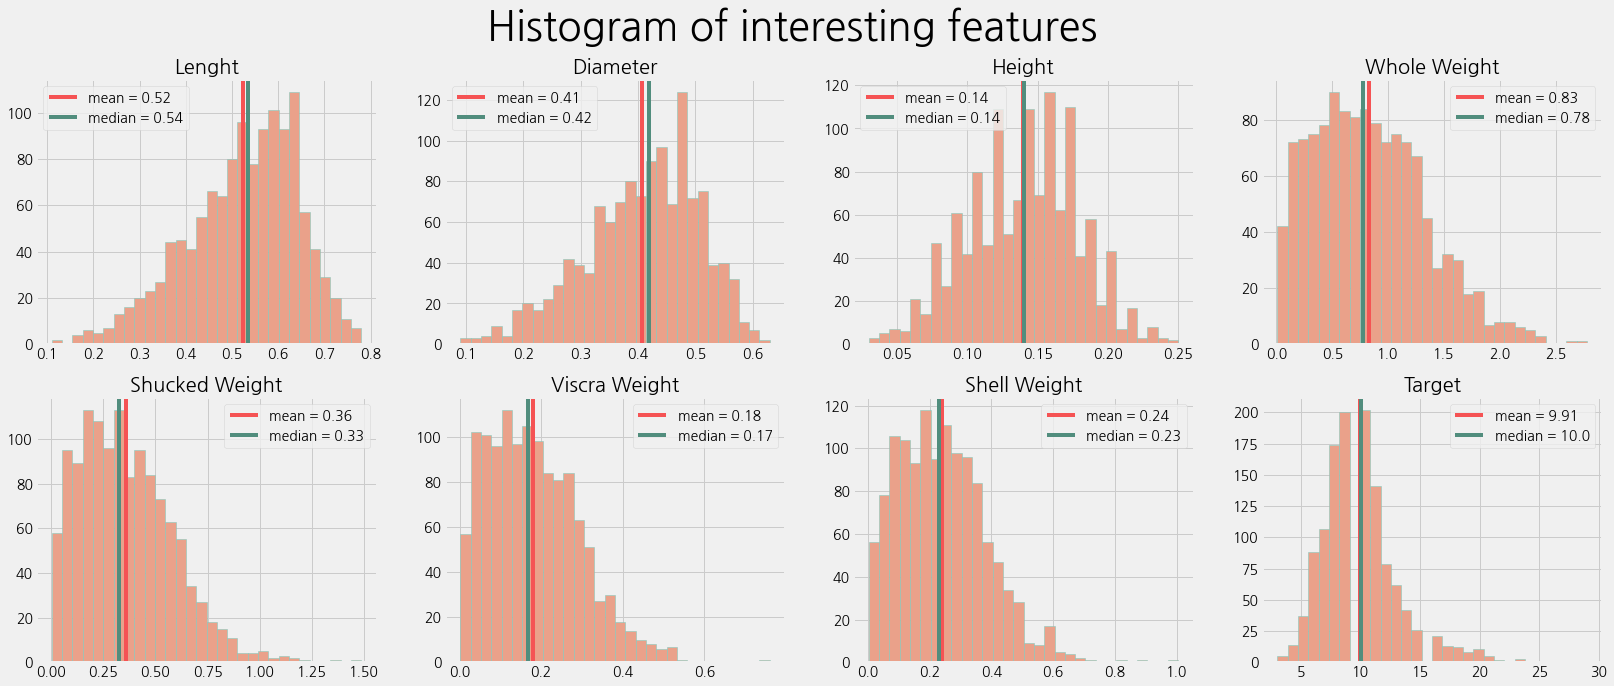

In [46]:
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['axes.titlecolor'] = 'black'

# 수치형 데이터 통계치 그래프
interest_coloumns = train.columns[1:]
plt.style.use('fivethirtyeight')
fig, ax =plt.subplots(2, 4, figsize = (25, 10))
fig.suptitle('Histogram of interesting features', fontsize=40)
column_idx = 0
for i in range(2):
    for j in range(4):
        ax[i][j].hist(train[interest_coloumns[column_idx]], bins=30, color='#eaa18a', edgecolor='#7bcabf')
        ax[i][j].set_title(interest_coloumns[column_idx])
        ax[i][j].axvline(data_description[interest_coloumns[column_idx]]['mean'], c='#f55354', label = f"mean = {round(data_description[interest_coloumns[column_idx]]['mean'], 2)}")
        ax[i][j].axvline(data_description[interest_coloumns[column_idx]]['50%'], c='#518d7d', label = f"median = {round(data_description[interest_coloumns[column_idx]]['50%'], 2)}")
        ax[i][j].legend()
        column_idx += 1

In [47]:
print('전복의 평균 나이는', round(data_description[interest_coloumns[7]]['mean'],1), '입니다') #round를 하여 소수점 1의 자리까지 반올림 하였습니다.

전복의 평균 나이는 9.9 입니다


In [49]:
# 29살 이상치라 판단
train_pre[train_pre["Target"] > 20]

,Gender_F,Gender_I,Gender_M,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
216,0,0,1,0.675,0.555,0.200,1.4385,0.5450,0.2665,0.465,21
448,1,0,0,0.680,0.550,0.200,1.5960,0.5250,0.4075,0.585,21
553,1,0,0,0.450,0.380,0.165,0.8165,0.2500,0.1915,0.265,23
629,0,0,1,0.655,0.540,0.215,1.8440,0.7425,0.3270,0.585,22
735,1,0,0,0.640,0.525,0.215,1.7790,0.4535,0.2855,0.550,22
762,1,0,0,0.700,0.585,0.185,1.8075,0.7055,0.3215,0.475,29
792,0,0,1,0.735,0.590,0.225,1.7560,0.6370,0.3405,0.580,21
1131,1,0,0,0.550,0.415,0.135,0.7750,0.3020,0.1790,0.260,23
1140,0,0,1,0.490,0.390,0.150,0.5730,0.2250,0.1240,0.170,21
1172,1,0,0,0.665,0.500,0.175,1.7420,0.5950,0.3025,0.725,21


In [51]:
# 이상치 제거
train_pre = train_pre.drop(index = [762],axis = 0) 

In [53]:
# 전복의 전체 무게 = 껍질을 제외한 무게 + 껍질의 무게
# 전복의 전체 무게 < 껍질을 제외한 무게 + 껍질의 무게 찾기

train_pre[train_pre["Whole Weight"] < train_pre["Shucked Weight"] + train_pre["Shell Weight"]]

,Gender_F,Gender_I,Gender_M,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
47,0,1,0,0.380,0.275,0.095,0.1375,0.0860,0.0585,0.0605,7
382,0,1,0,0.455,0.330,0.100,0.3720,0.3580,0.0775,0.1100,8
435,0,1,0,0.475,0.365,0.100,0.1315,0.2025,0.0875,0.1230,7
847,0,1,0,0.230,0.165,0.060,0.0515,0.0190,0.0145,0.0360,4
1078,0,1,0,0.275,0.205,0.070,0.1055,0.4950,0.0190,0.0315,5


In [54]:
# 이상치 제거
train_pre = train_pre.drop(index = [47,382,435,847,1078], axis = 0)

In [56]:
# 내장 무게 > 전복 
train_pre[train_pre["Shucked Weight"] < train_pre["Viscra Weight"]]

,Gender_F,Gender_I,Gender_M,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
465,0,0,1,0.415,0.315,0.125,0.388,0.068,0.09,0.125,12


In [57]:
train_pre = train_pre.drop(index = [465], axis = 0)

In [63]:
train_pre.head()

,Gender_F,Gender_I,Gender_M,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,0,0,1,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,0,1,0,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,0,1,0,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,0,0,1,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,0,1,0,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6


In [68]:
# 총 무게 = 껍질 제외한 전복 무게(shucked) + 껍질(shell) + 물(water)
# 껍질 제외한 전복 무게(shucked) = 내장(viscera) + 먹는부분(main)

train_pre["Water"] = train_pre["Whole Weight"] - (train_pre["Shucked Weight"] + train_pre["Shell Weight"])
train_pre["Main"] = train_pre["Shucked Weight"] - train_pre["Viscra Weight"]

test_pre["Water"] = test_pre["Whole Weight"] - (test_pre["Shucked Weight"] + test_pre["Shell Weight"])
test_pre["Main"] = test_pre["Shucked Weight"] - test_pre["Viscra Weight"]

In [69]:
train_pre.head()

,Gender_F,Gender_I,Gender_M,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target,Water,Main
0,0,0,1,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15,0.4115,0.1015
1,0,1,0,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8,0.0985,0.0950
2,0,1,0,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18,0.3760,0.2765
3,0,0,1,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13,0.3855,0.2215
4,0,1,0,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6,0.0390,0.0170


In [70]:
train_pre = train_pre[["Gender_F","Gender_I","Gender_M","Lenght","Diameter","Height","Whole Weight","Shucked Weight","Viscra Weight","Shell Weight","Water","Main","Target"]]
test_pre = test_pre[["Gender_F","Gender_I","Gender_M","Lenght","Diameter","Height","Whole Weight","Shucked Weight","Viscra Weight","Shell Weight","Water","Main"]]

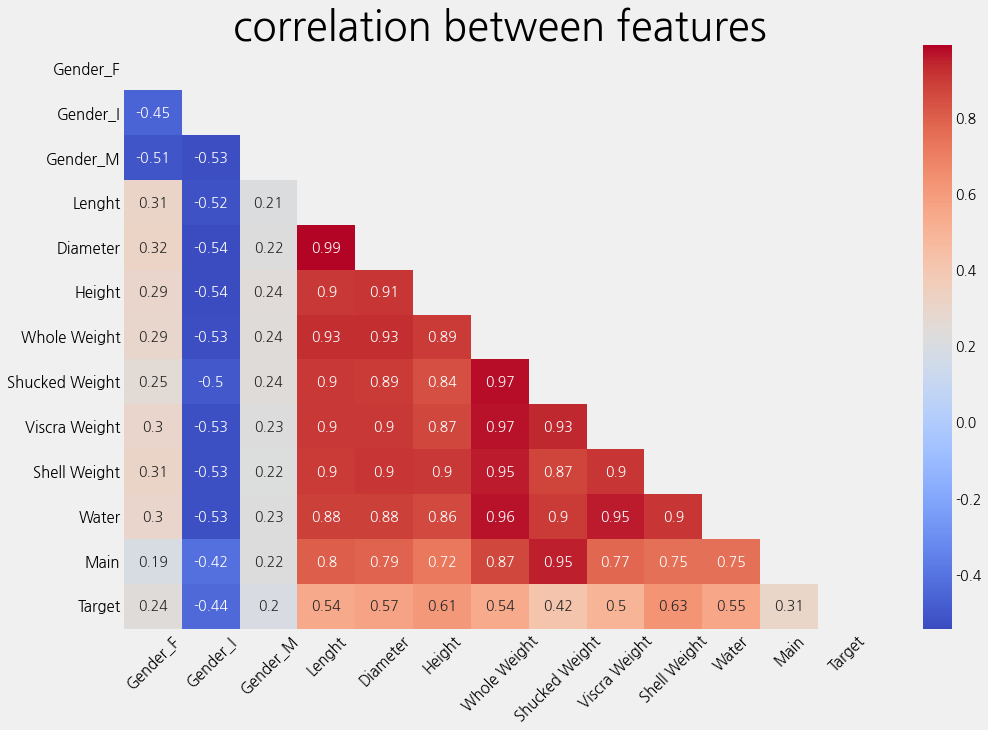

In [71]:
corr_heatmap(train_pre)

In [83]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)


# Shucked Weight : 껍질을 제외한 무게
# Viscra Weight : 내장 무게
# Shell Weight : 껍질 무게

# 모델링

In [95]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression # 릿지, 라쏘, 선형회귀
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from catboost import CatBoostRegressor, Pool
from sklearn.tree import DecisionTreeRegressor #의사결정회귀
from xgboost import XGBRegressor #XGB회귀
from lightgbm import LGBMRegressor #LGB회귀
from ngboost import NGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score # 교차검증
from sklearn.model_selection import train_test_split


from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [112]:
Cat_reg = CatBoostRegressor()
Decision_reg = DecisionTreeRegressor()
XGB_reg = XGBRegressor()
LGBM_reg = LGBMRegressor()
NGB_reg = NGBRegressor()
MLP_reg = MLPRegressor()


In [116]:
X_train = train_pre.iloc[:,:-1]
y_train = train_pre["Target"]

X_test = test_pre


X_train = np.log1p(X_train)
X_test = np.log1p(X_test)

X_data = X_train.copy()
y_target = y_train.copy()

In [117]:
def NMAE(true, pred):
    mae = np.mean(np.abs(true-pred))
    score = mae / np.mean(np.abs(true))
    return score

In [118]:
#nmae_score = make_scorer(NMAE, greater_is_better=False)
kf = KFold(n_splits = 2, random_state = 42, shuffle = True)

In [119]:
def get_avg_NAME_cv(models):
    
    for model in models:
        
        # 분할하지 않고 전체 데이터로 cross_val_score() 수행
        mae_avg = np.mean(-cross_val_score(model, X_data, y_target, scoring = "neg_mean_absolute_error", cv = 5 ))
        NMAE_avg = mae_avg / np.mean(np.abs(y_target))
        
        print("\n{0} CV 평균 NMAE 값 : {1}".format(model.__class__.__name__, np.round(NMAE_avg,3)))
        
        #return NMAE_avg

In [120]:
def cross_validation_predict(model, X_data, y_target, test, n_split) :
    
    kf = KFold(n_splits = n_split, random_state = 42, shuffle = True )
    
    loss_list = []
    
    model_pred = np.zeros((test.shape[0]))
    
    for tr_idx, val_idx in kf.split(X_data, y_target) :
        
        tr_x, tr_y = X_data.iloc[tr_idx], y_target.iloc[tr_idx]
        val_x, val_y = X_data.iloc[val_idx], y_target.iloc[val_idx]
        
        
        model.fit(tr_x, tr_y)
        
        pred = model.predict(val_x)
        sub_pred = model.predict(test)
        nmae = NMAE(val_y, pred)
        
        loss_list.append(nmae)
        
        model_pred += (sub_pred / n_split)
        
    print("검증 nmae : ", np.mean(loss_list) )
    print(f"{model.__class__.__name__} 예측값 \n {model_pred}")
    
    return model_pred


In [121]:
def print_best_params(model,X_data, y_target,test, params, cv = 10):
    
    grid_model = GridSearchCV(model, param_grid = params, scoring = "neg_mean_absolute_error", cv = cv)
    
    grid_model.fit(X_data, y_target)
    
    mae = (-1 * grid_model.best_score_)
    nmae = mae / np.mean(np.abs(y_target))
    
    Model = grid_model.best_estimator_
    Model_pred = Model.predict(test)

    
    print("{0} {1} CV 시 최적 평균 NMAE 값 : {2}, 최적 alpha : {3}".format(model.__class__.__name__, cv , np.round(nmae,8), grid_model.best_params_))
    print("최적 파라미터로 예측한 값 \n", Model_pred)
    
    return Model_pred

In [122]:
# Cat_reg = CatBoostRegressor()
# Decision_reg = DecisionTreeRegressor()
# XGB_reg = XGBRegressor()
# LGBM_reg = LGBMRegressor()
# NGB_reg = NGBRegressor()
# MLP_reg = MLPRegressor()


In [114]:
#models = [ridge, lasso, linear, cat_reg, ngb_reg, gb_reg, rf_reg, dt_reg, xgb_reg, lgbm_reg]
models = [Cat_reg,Decision_reg,XGB_reg,LGBM_reg,NGB_reg,MLP_reg]

get_avg_NAME_cv(models)

# cat 0.161, lgb 0.169, ngb 0.158, xgb 0.177, MLP 0.178

Learning rate set to 0.040917
0:	learn: 3.1817980	total: 32.7ms	remaining: 32.7s
1:	learn: 3.1407765	total: 34ms	remaining: 17s
2:	learn: 3.0957502	total: 35.4ms	remaining: 11.8s
3:	learn: 3.0546354	total: 36.8ms	remaining: 9.16s
4:	learn: 3.0154305	total: 38ms	remaining: 7.55s
5:	learn: 2.9740620	total: 39.3ms	remaining: 6.51s
6:	learn: 2.9417340	total: 40.7ms	remaining: 5.78s
7:	learn: 2.9082252	total: 42.1ms	remaining: 5.22s
8:	learn: 2.8769440	total: 43.4ms	remaining: 4.78s
9:	learn: 2.8496631	total: 44.8ms	remaining: 4.43s
10:	learn: 2.8211324	total: 47ms	remaining: 4.23s
11:	learn: 2.7945301	total: 48.5ms	remaining: 3.99s
12:	learn: 2.7639364	total: 49.7ms	remaining: 3.78s
13:	learn: 2.7423723	total: 51ms	remaining: 3.59s
14:	learn: 2.7202321	total: 52.2ms	remaining: 3.43s
15:	learn: 2.7012342	total: 53.4ms	remaining: 3.29s
16:	learn: 2.6809123	total: 54.9ms	remaining: 3.17s
17:	learn: 2.6585348	total: 56.3ms	remaining: 3.07s
18:	learn: 2.6409148	total: 57.5ms	remaining: 2.97s
19

207:	learn: 1.8217326	total: 326ms	remaining: 1.24s
208:	learn: 1.8203642	total: 328ms	remaining: 1.24s
209:	learn: 1.8188932	total: 329ms	remaining: 1.24s
210:	learn: 1.8166229	total: 331ms	remaining: 1.24s
211:	learn: 1.8147644	total: 333ms	remaining: 1.24s
212:	learn: 1.8129361	total: 335ms	remaining: 1.24s
213:	learn: 1.8120450	total: 337ms	remaining: 1.24s
214:	learn: 1.8087325	total: 338ms	remaining: 1.23s
215:	learn: 1.8073070	total: 339ms	remaining: 1.23s
216:	learn: 1.8056747	total: 341ms	remaining: 1.23s
217:	learn: 1.8022441	total: 343ms	remaining: 1.23s
218:	learn: 1.7997988	total: 345ms	remaining: 1.23s
219:	learn: 1.7971529	total: 346ms	remaining: 1.23s
220:	learn: 1.7956590	total: 347ms	remaining: 1.22s
221:	learn: 1.7925792	total: 349ms	remaining: 1.22s
222:	learn: 1.7912868	total: 350ms	remaining: 1.22s
223:	learn: 1.7893092	total: 352ms	remaining: 1.22s
224:	learn: 1.7862690	total: 353ms	remaining: 1.22s
225:	learn: 1.7824266	total: 355ms	remaining: 1.22s
226:	learn: 

435:	learn: 1.4697321	total: 663ms	remaining: 858ms
436:	learn: 1.4688491	total: 665ms	remaining: 857ms
437:	learn: 1.4675765	total: 667ms	remaining: 855ms
438:	learn: 1.4663514	total: 668ms	remaining: 853ms
439:	learn: 1.4658264	total: 669ms	remaining: 852ms
440:	learn: 1.4654171	total: 670ms	remaining: 850ms
441:	learn: 1.4645884	total: 672ms	remaining: 848ms
442:	learn: 1.4632003	total: 673ms	remaining: 847ms
443:	learn: 1.4613513	total: 675ms	remaining: 845ms
444:	learn: 1.4611050	total: 676ms	remaining: 844ms
445:	learn: 1.4590002	total: 678ms	remaining: 842ms
446:	learn: 1.4589664	total: 678ms	remaining: 839ms
447:	learn: 1.4562649	total: 680ms	remaining: 838ms
448:	learn: 1.4554694	total: 681ms	remaining: 836ms
449:	learn: 1.4554087	total: 683ms	remaining: 835ms
450:	learn: 1.4548036	total: 685ms	remaining: 834ms
451:	learn: 1.4542585	total: 687ms	remaining: 832ms
452:	learn: 1.4519954	total: 688ms	remaining: 831ms
453:	learn: 1.4510111	total: 689ms	remaining: 829ms
454:	learn: 

632:	learn: 1.2761452	total: 1s	remaining: 582ms
633:	learn: 1.2756819	total: 1s	remaining: 580ms
634:	learn: 1.2755858	total: 1.01s	remaining: 579ms
635:	learn: 1.2747520	total: 1.01s	remaining: 577ms
636:	learn: 1.2736845	total: 1.01s	remaining: 575ms
637:	learn: 1.2736209	total: 1.01s	remaining: 574ms
638:	learn: 1.2736002	total: 1.01s	remaining: 572ms
639:	learn: 1.2734668	total: 1.01s	remaining: 570ms
640:	learn: 1.2717243	total: 1.01s	remaining: 569ms
641:	learn: 1.2697943	total: 1.02s	remaining: 567ms
642:	learn: 1.2697111	total: 1.02s	remaining: 566ms
643:	learn: 1.2678525	total: 1.02s	remaining: 564ms
644:	learn: 1.2671756	total: 1.02s	remaining: 562ms
645:	learn: 1.2655755	total: 1.02s	remaining: 561ms
646:	learn: 1.2636856	total: 1.02s	remaining: 559ms
647:	learn: 1.2620535	total: 1.02s	remaining: 557ms
648:	learn: 1.2618000	total: 1.03s	remaining: 556ms
649:	learn: 1.2599767	total: 1.03s	remaining: 554ms
650:	learn: 1.2581745	total: 1.03s	remaining: 553ms
651:	learn: 1.2565

855:	learn: 1.0873124	total: 1.34s	remaining: 226ms
856:	learn: 1.0864145	total: 1.34s	remaining: 225ms
857:	learn: 1.0855191	total: 1.35s	remaining: 223ms
858:	learn: 1.0845219	total: 1.35s	remaining: 221ms
859:	learn: 1.0836652	total: 1.35s	remaining: 220ms
860:	learn: 1.0834451	total: 1.35s	remaining: 218ms
861:	learn: 1.0831038	total: 1.35s	remaining: 217ms
862:	learn: 1.0824412	total: 1.35s	remaining: 215ms
863:	learn: 1.0821946	total: 1.36s	remaining: 213ms
864:	learn: 1.0810682	total: 1.36s	remaining: 212ms
865:	learn: 1.0802969	total: 1.36s	remaining: 210ms
866:	learn: 1.0783411	total: 1.36s	remaining: 209ms
867:	learn: 1.0782860	total: 1.36s	remaining: 207ms
868:	learn: 1.0774362	total: 1.36s	remaining: 206ms
869:	learn: 1.0761553	total: 1.36s	remaining: 204ms
870:	learn: 1.0758882	total: 1.37s	remaining: 202ms
871:	learn: 1.0758624	total: 1.37s	remaining: 201ms
872:	learn: 1.0756423	total: 1.37s	remaining: 199ms
873:	learn: 1.0754281	total: 1.37s	remaining: 198ms
874:	learn: 

48:	learn: 2.2432495	total: 70.9ms	remaining: 1.38s
49:	learn: 2.2383622	total: 72.5ms	remaining: 1.38s
50:	learn: 2.2332848	total: 73.8ms	remaining: 1.37s
51:	learn: 2.2271414	total: 75.2ms	remaining: 1.37s
52:	learn: 2.2210344	total: 76.9ms	remaining: 1.37s
53:	learn: 2.2136760	total: 78.3ms	remaining: 1.37s
54:	learn: 2.2066153	total: 79.7ms	remaining: 1.37s
55:	learn: 2.2008184	total: 81ms	remaining: 1.36s
56:	learn: 2.1960384	total: 82.5ms	remaining: 1.36s
57:	learn: 2.1877291	total: 83.9ms	remaining: 1.36s
58:	learn: 2.1827020	total: 85.4ms	remaining: 1.36s
59:	learn: 2.1788165	total: 87.9ms	remaining: 1.38s
60:	learn: 2.1740221	total: 89.9ms	remaining: 1.38s
61:	learn: 2.1682910	total: 91.3ms	remaining: 1.38s
62:	learn: 2.1629996	total: 92.6ms	remaining: 1.38s
63:	learn: 2.1584875	total: 94ms	remaining: 1.38s
64:	learn: 2.1531902	total: 95.4ms	remaining: 1.37s
65:	learn: 2.1484979	total: 96.8ms	remaining: 1.37s
66:	learn: 2.1424960	total: 98.2ms	remaining: 1.37s
67:	learn: 2.138

280:	learn: 1.6447337	total: 409ms	remaining: 1.04s
281:	learn: 1.6429951	total: 411ms	remaining: 1.04s
282:	learn: 1.6413077	total: 413ms	remaining: 1.04s
283:	learn: 1.6402326	total: 414ms	remaining: 1.04s
284:	learn: 1.6401702	total: 415ms	remaining: 1.04s
285:	learn: 1.6384577	total: 417ms	remaining: 1.04s
286:	learn: 1.6383741	total: 418ms	remaining: 1.04s
287:	learn: 1.6342656	total: 420ms	remaining: 1.04s
288:	learn: 1.6341271	total: 421ms	remaining: 1.04s
289:	learn: 1.6330916	total: 424ms	remaining: 1.04s
290:	learn: 1.6329215	total: 426ms	remaining: 1.04s
291:	learn: 1.6328539	total: 429ms	remaining: 1.04s
292:	learn: 1.6311602	total: 432ms	remaining: 1.04s
293:	learn: 1.6309115	total: 434ms	remaining: 1.04s
294:	learn: 1.6290326	total: 437ms	remaining: 1.04s
295:	learn: 1.6269451	total: 438ms	remaining: 1.04s
296:	learn: 1.6230249	total: 440ms	remaining: 1.04s
297:	learn: 1.6214555	total: 441ms	remaining: 1.04s
298:	learn: 1.6192154	total: 443ms	remaining: 1.04s
299:	learn: 

505:	learn: 1.3562218	total: 744ms	remaining: 727ms
506:	learn: 1.3551671	total: 746ms	remaining: 725ms
507:	learn: 1.3550994	total: 747ms	remaining: 724ms
508:	learn: 1.3535658	total: 748ms	remaining: 722ms
509:	learn: 1.3514342	total: 750ms	remaining: 720ms
510:	learn: 1.3513715	total: 751ms	remaining: 719ms
511:	learn: 1.3494605	total: 753ms	remaining: 718ms
512:	learn: 1.3477388	total: 755ms	remaining: 716ms
513:	learn: 1.3459632	total: 756ms	remaining: 715ms
514:	learn: 1.3457251	total: 757ms	remaining: 713ms
515:	learn: 1.3456174	total: 759ms	remaining: 712ms
516:	learn: 1.3442599	total: 761ms	remaining: 711ms
517:	learn: 1.3442104	total: 762ms	remaining: 709ms
518:	learn: 1.3430588	total: 764ms	remaining: 708ms
519:	learn: 1.3420444	total: 765ms	remaining: 706ms
520:	learn: 1.3420060	total: 766ms	remaining: 705ms
521:	learn: 1.3404803	total: 768ms	remaining: 703ms
522:	learn: 1.3400271	total: 770ms	remaining: 702ms
523:	learn: 1.3398589	total: 771ms	remaining: 701ms
524:	learn: 

740:	learn: 1.1520506	total: 1.08s	remaining: 378ms
741:	learn: 1.1505520	total: 1.08s	remaining: 377ms
742:	learn: 1.1484136	total: 1.09s	remaining: 376ms
743:	learn: 1.1464659	total: 1.09s	remaining: 374ms
744:	learn: 1.1449749	total: 1.09s	remaining: 373ms
745:	learn: 1.1445631	total: 1.09s	remaining: 371ms
746:	learn: 1.1436264	total: 1.09s	remaining: 370ms
747:	learn: 1.1427097	total: 1.09s	remaining: 368ms
748:	learn: 1.1408637	total: 1.09s	remaining: 367ms
749:	learn: 1.1407765	total: 1.1s	remaining: 366ms
750:	learn: 1.1405348	total: 1.1s	remaining: 364ms
751:	learn: 1.1393502	total: 1.1s	remaining: 363ms
752:	learn: 1.1374734	total: 1.1s	remaining: 361ms
753:	learn: 1.1372781	total: 1.1s	remaining: 360ms
754:	learn: 1.1367426	total: 1.1s	remaining: 359ms
755:	learn: 1.1360781	total: 1.11s	remaining: 357ms
756:	learn: 1.1348662	total: 1.11s	remaining: 356ms
757:	learn: 1.1343982	total: 1.11s	remaining: 354ms
758:	learn: 1.1339117	total: 1.11s	remaining: 353ms
759:	learn: 1.1335

962:	learn: 0.9961194	total: 1.42s	remaining: 54.5ms
963:	learn: 0.9953931	total: 1.42s	remaining: 53ms
964:	learn: 0.9942126	total: 1.42s	remaining: 51.5ms
965:	learn: 0.9933496	total: 1.42s	remaining: 50.1ms
966:	learn: 0.9928082	total: 1.43s	remaining: 48.7ms
967:	learn: 0.9924767	total: 1.43s	remaining: 47.2ms
968:	learn: 0.9912516	total: 1.43s	remaining: 45.7ms
969:	learn: 0.9908614	total: 1.43s	remaining: 44.3ms
970:	learn: 0.9900937	total: 1.43s	remaining: 42.8ms
971:	learn: 0.9890988	total: 1.43s	remaining: 41.3ms
972:	learn: 0.9889437	total: 1.44s	remaining: 39.9ms
973:	learn: 0.9884289	total: 1.44s	remaining: 38.4ms
974:	learn: 0.9883866	total: 1.44s	remaining: 36.9ms
975:	learn: 0.9880811	total: 1.44s	remaining: 35.4ms
976:	learn: 0.9877091	total: 1.44s	remaining: 34ms
977:	learn: 0.9870171	total: 1.44s	remaining: 32.5ms
978:	learn: 0.9861929	total: 1.44s	remaining: 31ms
979:	learn: 0.9846308	total: 1.45s	remaining: 29.5ms
980:	learn: 0.9831900	total: 1.45s	remaining: 28ms
9

155:	learn: 1.8592310	total: 235ms	remaining: 1.27s
156:	learn: 1.8580616	total: 237ms	remaining: 1.27s
157:	learn: 1.8555166	total: 238ms	remaining: 1.27s
158:	learn: 1.8531950	total: 240ms	remaining: 1.27s
159:	learn: 1.8516105	total: 241ms	remaining: 1.27s
160:	learn: 1.8500704	total: 243ms	remaining: 1.26s
161:	learn: 1.8482598	total: 244ms	remaining: 1.26s
162:	learn: 1.8461779	total: 246ms	remaining: 1.26s
163:	learn: 1.8430329	total: 248ms	remaining: 1.26s
164:	learn: 1.8409142	total: 250ms	remaining: 1.26s
165:	learn: 1.8387268	total: 251ms	remaining: 1.26s
166:	learn: 1.8366816	total: 253ms	remaining: 1.26s
167:	learn: 1.8348938	total: 254ms	remaining: 1.26s
168:	learn: 1.8338190	total: 256ms	remaining: 1.26s
169:	learn: 1.8303254	total: 258ms	remaining: 1.26s
170:	learn: 1.8286716	total: 259ms	remaining: 1.26s
171:	learn: 1.8269125	total: 261ms	remaining: 1.25s
172:	learn: 1.8228715	total: 262ms	remaining: 1.25s
173:	learn: 1.8213502	total: 264ms	remaining: 1.25s
174:	learn: 

371:	learn: 1.4816886	total: 573ms	remaining: 967ms
372:	learn: 1.4801394	total: 574ms	remaining: 965ms
373:	learn: 1.4788447	total: 575ms	remaining: 963ms
374:	learn: 1.4763811	total: 577ms	remaining: 961ms
375:	learn: 1.4755150	total: 578ms	remaining: 959ms
376:	learn: 1.4745736	total: 579ms	remaining: 958ms
377:	learn: 1.4718688	total: 581ms	remaining: 956ms
378:	learn: 1.4711346	total: 582ms	remaining: 954ms
379:	learn: 1.4693434	total: 584ms	remaining: 953ms
380:	learn: 1.4688634	total: 585ms	remaining: 951ms
381:	learn: 1.4686553	total: 587ms	remaining: 949ms
382:	learn: 1.4676501	total: 588ms	remaining: 948ms
383:	learn: 1.4662180	total: 590ms	remaining: 947ms
384:	learn: 1.4645779	total: 592ms	remaining: 945ms
385:	learn: 1.4622956	total: 593ms	remaining: 943ms
386:	learn: 1.4606795	total: 594ms	remaining: 942ms
387:	learn: 1.4593908	total: 596ms	remaining: 940ms
388:	learn: 1.4588294	total: 597ms	remaining: 938ms
389:	learn: 1.4581523	total: 599ms	remaining: 936ms
390:	learn: 

604:	learn: 1.2095376	total: 910ms	remaining: 594ms
605:	learn: 1.2090107	total: 912ms	remaining: 593ms
606:	learn: 1.2086506	total: 914ms	remaining: 592ms
607:	learn: 1.2079546	total: 915ms	remaining: 590ms
608:	learn: 1.2069593	total: 916ms	remaining: 588ms
609:	learn: 1.2049751	total: 918ms	remaining: 587ms
610:	learn: 1.2037316	total: 919ms	remaining: 585ms
611:	learn: 1.2034949	total: 921ms	remaining: 584ms
612:	learn: 1.2025304	total: 923ms	remaining: 583ms
613:	learn: 1.2024267	total: 925ms	remaining: 581ms
614:	learn: 1.2007650	total: 926ms	remaining: 580ms
615:	learn: 1.1995849	total: 927ms	remaining: 578ms
616:	learn: 1.1991368	total: 929ms	remaining: 577ms
617:	learn: 1.1987018	total: 931ms	remaining: 575ms
618:	learn: 1.1986364	total: 933ms	remaining: 574ms
619:	learn: 1.1972261	total: 934ms	remaining: 572ms
620:	learn: 1.1971222	total: 935ms	remaining: 571ms
621:	learn: 1.1964180	total: 937ms	remaining: 569ms
622:	learn: 1.1954708	total: 938ms	remaining: 568ms
623:	learn: 

837:	learn: 1.0295717	total: 1.25s	remaining: 241ms
838:	learn: 1.0282698	total: 1.25s	remaining: 240ms
839:	learn: 1.0274683	total: 1.25s	remaining: 238ms
840:	learn: 1.0263505	total: 1.25s	remaining: 237ms
841:	learn: 1.0262711	total: 1.25s	remaining: 235ms
842:	learn: 1.0255862	total: 1.25s	remaining: 234ms
843:	learn: 1.0255312	total: 1.26s	remaining: 232ms
844:	learn: 1.0252424	total: 1.26s	remaining: 231ms
845:	learn: 1.0248908	total: 1.26s	remaining: 229ms
846:	learn: 1.0235075	total: 1.26s	remaining: 228ms
847:	learn: 1.0225222	total: 1.26s	remaining: 227ms
848:	learn: 1.0221672	total: 1.26s	remaining: 225ms
849:	learn: 1.0206481	total: 1.27s	remaining: 224ms
850:	learn: 1.0191127	total: 1.27s	remaining: 222ms
851:	learn: 1.0190788	total: 1.27s	remaining: 221ms
852:	learn: 1.0187952	total: 1.27s	remaining: 219ms
853:	learn: 1.0186303	total: 1.27s	remaining: 218ms
854:	learn: 1.0185157	total: 1.28s	remaining: 216ms
855:	learn: 1.0181444	total: 1.28s	remaining: 215ms
856:	learn: 

4:	learn: 3.0255523	total: 7.63ms	remaining: 1.52s
5:	learn: 2.9857535	total: 9.23ms	remaining: 1.53s
6:	learn: 2.9525005	total: 10.8ms	remaining: 1.54s
7:	learn: 2.9172896	total: 12.5ms	remaining: 1.54s
8:	learn: 2.8860846	total: 13.9ms	remaining: 1.53s
9:	learn: 2.8600188	total: 15.4ms	remaining: 1.52s
10:	learn: 2.8312600	total: 16.9ms	remaining: 1.52s
11:	learn: 2.8065068	total: 18.6ms	remaining: 1.53s
12:	learn: 2.7771003	total: 33.8ms	remaining: 2.56s
13:	learn: 2.7545419	total: 35.2ms	remaining: 2.48s
14:	learn: 2.7354426	total: 36.6ms	remaining: 2.4s
15:	learn: 2.7125516	total: 38.3ms	remaining: 2.35s
16:	learn: 2.6901360	total: 39.8ms	remaining: 2.3s
17:	learn: 2.6695763	total: 41.1ms	remaining: 2.24s
18:	learn: 2.6535972	total: 42.3ms	remaining: 2.18s
19:	learn: 2.6364277	total: 43.5ms	remaining: 2.13s
20:	learn: 2.6171686	total: 44.8ms	remaining: 2.09s
21:	learn: 2.5994819	total: 46ms	remaining: 2.04s
22:	learn: 2.5814491	total: 48.7ms	remaining: 2.07s
23:	learn: 2.5661360	t

200:	learn: 1.8453924	total: 349ms	remaining: 1.39s
201:	learn: 1.8430090	total: 350ms	remaining: 1.38s
202:	learn: 1.8403353	total: 352ms	remaining: 1.38s
203:	learn: 1.8359623	total: 354ms	remaining: 1.38s
204:	learn: 1.8335023	total: 355ms	remaining: 1.38s
205:	learn: 1.8313830	total: 357ms	remaining: 1.37s
206:	learn: 1.8286125	total: 358ms	remaining: 1.37s
207:	learn: 1.8274881	total: 359ms	remaining: 1.37s
208:	learn: 1.8262605	total: 361ms	remaining: 1.36s
209:	learn: 1.8246300	total: 363ms	remaining: 1.37s
210:	learn: 1.8235393	total: 365ms	remaining: 1.36s
211:	learn: 1.8200182	total: 366ms	remaining: 1.36s
212:	learn: 1.8183020	total: 368ms	remaining: 1.36s
213:	learn: 1.8153025	total: 369ms	remaining: 1.35s
214:	learn: 1.8145832	total: 370ms	remaining: 1.35s
215:	learn: 1.8107562	total: 372ms	remaining: 1.35s
216:	learn: 1.8065727	total: 373ms	remaining: 1.35s
217:	learn: 1.8038474	total: 375ms	remaining: 1.34s
218:	learn: 1.8017326	total: 376ms	remaining: 1.34s
219:	learn: 

429:	learn: 1.4693355	total: 683ms	remaining: 906ms
430:	learn: 1.4675230	total: 685ms	remaining: 904ms
431:	learn: 1.4664628	total: 686ms	remaining: 902ms
432:	learn: 1.4652827	total: 688ms	remaining: 901ms
433:	learn: 1.4636954	total: 689ms	remaining: 899ms
434:	learn: 1.4635628	total: 690ms	remaining: 897ms
435:	learn: 1.4633690	total: 692ms	remaining: 895ms
436:	learn: 1.4621786	total: 693ms	remaining: 893ms
437:	learn: 1.4616170	total: 694ms	remaining: 891ms
438:	learn: 1.4604715	total: 696ms	remaining: 889ms
439:	learn: 1.4574916	total: 697ms	remaining: 887ms
440:	learn: 1.4552695	total: 699ms	remaining: 886ms
441:	learn: 1.4538895	total: 700ms	remaining: 884ms
442:	learn: 1.4527457	total: 702ms	remaining: 882ms
443:	learn: 1.4491082	total: 703ms	remaining: 881ms
444:	learn: 1.4489552	total: 705ms	remaining: 879ms
445:	learn: 1.4470839	total: 706ms	remaining: 878ms
446:	learn: 1.4464654	total: 708ms	remaining: 876ms
447:	learn: 1.4464150	total: 709ms	remaining: 874ms
448:	learn: 

675:	learn: 1.2044630	total: 1.02s	remaining: 489ms
676:	learn: 1.2028188	total: 1.02s	remaining: 488ms
677:	learn: 1.2009912	total: 1.02s	remaining: 486ms
678:	learn: 1.1987370	total: 1.02s	remaining: 484ms
679:	learn: 1.1970374	total: 1.02s	remaining: 483ms
680:	learn: 1.1969987	total: 1.03s	remaining: 481ms
681:	learn: 1.1969667	total: 1.03s	remaining: 480ms
682:	learn: 1.1967410	total: 1.03s	remaining: 478ms
683:	learn: 1.1948778	total: 1.03s	remaining: 476ms
684:	learn: 1.1938706	total: 1.03s	remaining: 475ms
685:	learn: 1.1928164	total: 1.03s	remaining: 473ms
686:	learn: 1.1921939	total: 1.03s	remaining: 472ms
687:	learn: 1.1902652	total: 1.04s	remaining: 470ms
688:	learn: 1.1901562	total: 1.04s	remaining: 469ms
689:	learn: 1.1896812	total: 1.04s	remaining: 467ms
690:	learn: 1.1881916	total: 1.04s	remaining: 466ms
691:	learn: 1.1875620	total: 1.04s	remaining: 464ms
692:	learn: 1.1870448	total: 1.04s	remaining: 463ms
693:	learn: 1.1859896	total: 1.05s	remaining: 461ms
694:	learn: 

910:	learn: 1.0233015	total: 1.36s	remaining: 133ms
911:	learn: 1.0226114	total: 1.36s	remaining: 131ms
912:	learn: 1.0217727	total: 1.36s	remaining: 130ms
913:	learn: 1.0217606	total: 1.36s	remaining: 128ms
914:	learn: 1.0216582	total: 1.36s	remaining: 127ms
915:	learn: 1.0199115	total: 1.36s	remaining: 125ms
916:	learn: 1.0185293	total: 1.37s	remaining: 124ms
917:	learn: 1.0175198	total: 1.37s	remaining: 122ms
918:	learn: 1.0169578	total: 1.37s	remaining: 121ms
919:	learn: 1.0164804	total: 1.37s	remaining: 119ms
920:	learn: 1.0158435	total: 1.37s	remaining: 118ms
921:	learn: 1.0147913	total: 1.37s	remaining: 116ms
922:	learn: 1.0145031	total: 1.38s	remaining: 115ms
923:	learn: 1.0141669	total: 1.38s	remaining: 113ms
924:	learn: 1.0133948	total: 1.38s	remaining: 112ms
925:	learn: 1.0129913	total: 1.38s	remaining: 110ms
926:	learn: 1.0127034	total: 1.38s	remaining: 109ms
927:	learn: 1.0114876	total: 1.39s	remaining: 107ms
928:	learn: 1.0111406	total: 1.39s	remaining: 106ms
929:	learn: 

111:	learn: 1.8781809	total: 163ms	remaining: 1.29s
112:	learn: 1.8760079	total: 164ms	remaining: 1.29s
113:	learn: 1.8728640	total: 166ms	remaining: 1.29s
114:	learn: 1.8697803	total: 167ms	remaining: 1.28s
115:	learn: 1.8661047	total: 169ms	remaining: 1.29s
116:	learn: 1.8640137	total: 171ms	remaining: 1.29s
117:	learn: 1.8624901	total: 172ms	remaining: 1.28s
118:	learn: 1.8598259	total: 173ms	remaining: 1.28s
119:	learn: 1.8573675	total: 175ms	remaining: 1.28s
120:	learn: 1.8559273	total: 176ms	remaining: 1.28s
121:	learn: 1.8529754	total: 178ms	remaining: 1.28s
122:	learn: 1.8506323	total: 180ms	remaining: 1.28s
123:	learn: 1.8484621	total: 182ms	remaining: 1.28s
124:	learn: 1.8472191	total: 183ms	remaining: 1.28s
125:	learn: 1.8449398	total: 185ms	remaining: 1.28s
126:	learn: 1.8420938	total: 186ms	remaining: 1.28s
127:	learn: 1.8406676	total: 188ms	remaining: 1.28s
128:	learn: 1.8397886	total: 189ms	remaining: 1.28s
129:	learn: 1.8373911	total: 191ms	remaining: 1.27s
130:	learn: 

339:	learn: 1.4455933	total: 499ms	remaining: 969ms
340:	learn: 1.4450862	total: 501ms	remaining: 968ms
341:	learn: 1.4443073	total: 502ms	remaining: 967ms
342:	learn: 1.4410621	total: 504ms	remaining: 965ms
343:	learn: 1.4386364	total: 505ms	remaining: 963ms
344:	learn: 1.4377271	total: 506ms	remaining: 962ms
345:	learn: 1.4373486	total: 508ms	remaining: 960ms
346:	learn: 1.4361920	total: 510ms	remaining: 959ms
347:	learn: 1.4354218	total: 512ms	remaining: 958ms
348:	learn: 1.4346939	total: 513ms	remaining: 957ms
349:	learn: 1.4340356	total: 514ms	remaining: 955ms
350:	learn: 1.4328279	total: 516ms	remaining: 953ms
351:	learn: 1.4316807	total: 517ms	remaining: 952ms
352:	learn: 1.4315050	total: 519ms	remaining: 951ms
353:	learn: 1.4310092	total: 520ms	remaining: 950ms
354:	learn: 1.4305058	total: 522ms	remaining: 948ms
355:	learn: 1.4281794	total: 523ms	remaining: 947ms
356:	learn: 1.4277272	total: 525ms	remaining: 945ms
357:	learn: 1.4264067	total: 526ms	remaining: 943ms
358:	learn: 

571:	learn: 1.1801081	total: 836ms	remaining: 626ms
572:	learn: 1.1788302	total: 838ms	remaining: 625ms
573:	learn: 1.1770482	total: 840ms	remaining: 623ms
574:	learn: 1.1767307	total: 841ms	remaining: 622ms
575:	learn: 1.1763498	total: 843ms	remaining: 621ms
576:	learn: 1.1758139	total: 845ms	remaining: 619ms
577:	learn: 1.1753654	total: 847ms	remaining: 618ms
578:	learn: 1.1750858	total: 848ms	remaining: 617ms
579:	learn: 1.1737739	total: 851ms	remaining: 616ms
580:	learn: 1.1731455	total: 853ms	remaining: 615ms
581:	learn: 1.1716596	total: 855ms	remaining: 614ms
582:	learn: 1.1706046	total: 857ms	remaining: 613ms
583:	learn: 1.1687803	total: 859ms	remaining: 612ms
584:	learn: 1.1681633	total: 861ms	remaining: 611ms
585:	learn: 1.1679417	total: 863ms	remaining: 610ms
586:	learn: 1.1672105	total: 865ms	remaining: 608ms
587:	learn: 1.1660508	total: 866ms	remaining: 607ms
588:	learn: 1.1655530	total: 868ms	remaining: 606ms
589:	learn: 1.1651018	total: 870ms	remaining: 604ms
590:	learn: 

778:	learn: 1.0054516	total: 1.17s	remaining: 333ms
779:	learn: 1.0050169	total: 1.18s	remaining: 331ms
780:	learn: 1.0047390	total: 1.18s	remaining: 330ms
781:	learn: 1.0032221	total: 1.18s	remaining: 329ms
782:	learn: 1.0018643	total: 1.18s	remaining: 327ms
783:	learn: 1.0004774	total: 1.18s	remaining: 326ms
784:	learn: 1.0001651	total: 1.18s	remaining: 324ms
785:	learn: 0.9989078	total: 1.19s	remaining: 323ms
786:	learn: 0.9985261	total: 1.19s	remaining: 321ms
787:	learn: 0.9984611	total: 1.19s	remaining: 320ms
788:	learn: 0.9979779	total: 1.19s	remaining: 318ms
789:	learn: 0.9975919	total: 1.19s	remaining: 317ms
790:	learn: 0.9962107	total: 1.19s	remaining: 316ms
791:	learn: 0.9952804	total: 1.2s	remaining: 314ms
792:	learn: 0.9947436	total: 1.2s	remaining: 313ms
793:	learn: 0.9941776	total: 1.2s	remaining: 311ms
794:	learn: 0.9934599	total: 1.2s	remaining: 310ms
795:	learn: 0.9933841	total: 1.2s	remaining: 308ms
796:	learn: 0.9923116	total: 1.2s	remaining: 307ms
797:	learn: 0.9912

982:	learn: 0.8671393	total: 1.51s	remaining: 26.1ms
983:	learn: 0.8662798	total: 1.51s	remaining: 24.6ms
984:	learn: 0.8660659	total: 1.51s	remaining: 23.1ms
985:	learn: 0.8653462	total: 1.51s	remaining: 21.5ms
986:	learn: 0.8651696	total: 1.52s	remaining: 20ms
987:	learn: 0.8642107	total: 1.52s	remaining: 18.4ms
988:	learn: 0.8639482	total: 1.52s	remaining: 16.9ms
989:	learn: 0.8632101	total: 1.52s	remaining: 15.4ms
990:	learn: 0.8619642	total: 1.52s	remaining: 13.8ms
991:	learn: 0.8613872	total: 1.52s	remaining: 12.3ms
992:	learn: 0.8613608	total: 1.53s	remaining: 10.8ms
993:	learn: 0.8611336	total: 1.53s	remaining: 9.23ms
994:	learn: 0.8601104	total: 1.53s	remaining: 7.69ms
995:	learn: 0.8588945	total: 1.53s	remaining: 6.15ms
996:	learn: 0.8574907	total: 1.53s	remaining: 4.61ms
997:	learn: 0.8568381	total: 1.53s	remaining: 3.07ms
998:	learn: 0.8560411	total: 1.53s	remaining: 1.54ms
999:	learn: 0.8558231	total: 1.54s	remaining: 0us

CatBoostRegressor CV 평균 NMAE 값 : 0.161

DecisionTr

In [123]:
Cat_reg.fit(X_train,y_train)
LGBM_reg.fit(X_train,y_train)
NGB_reg.fit(X_train,y_train)

Learning rate set to 0.042391
0:	learn: 3.1209008	total: 2.37ms	remaining: 2.37s
1:	learn: 3.0780336	total: 4.54ms	remaining: 2.27s
2:	learn: 3.0314628	total: 6.53ms	remaining: 2.17s
3:	learn: 2.9875140	total: 8.6ms	remaining: 2.14s
4:	learn: 2.9464211	total: 10ms	remaining: 1.99s
5:	learn: 2.9033873	total: 12ms	remaining: 1.99s
6:	learn: 2.8684922	total: 14.2ms	remaining: 2.02s
7:	learn: 2.8311936	total: 16ms	remaining: 1.99s
8:	learn: 2.7996989	total: 17.6ms	remaining: 1.93s
9:	learn: 2.7723018	total: 19.4ms	remaining: 1.92s
10:	learn: 2.7432845	total: 21.4ms	remaining: 1.92s
11:	learn: 2.7176378	total: 23ms	remaining: 1.9s
12:	learn: 2.6897621	total: 24.5ms	remaining: 1.86s
13:	learn: 2.6671623	total: 25.9ms	remaining: 1.82s
14:	learn: 2.6464782	total: 27.4ms	remaining: 1.8s
15:	learn: 2.6247697	total: 28.9ms	remaining: 1.78s
16:	learn: 2.6025810	total: 30.4ms	remaining: 1.76s
17:	learn: 2.5802730	total: 31.9ms	remaining: 1.74s
18:	learn: 2.5621997	total: 33.3ms	remaining: 1.72s
19:

217:	learn: 1.7846459	total: 338ms	remaining: 1.21s
218:	learn: 1.7821980	total: 340ms	remaining: 1.21s
219:	learn: 1.7815392	total: 341ms	remaining: 1.21s
220:	learn: 1.7803875	total: 342ms	remaining: 1.21s
221:	learn: 1.7782107	total: 344ms	remaining: 1.21s
222:	learn: 1.7767635	total: 346ms	remaining: 1.2s
223:	learn: 1.7761941	total: 348ms	remaining: 1.2s
224:	learn: 1.7743537	total: 349ms	remaining: 1.2s
225:	learn: 1.7728970	total: 351ms	remaining: 1.2s
226:	learn: 1.7704806	total: 353ms	remaining: 1.2s
227:	learn: 1.7700907	total: 355ms	remaining: 1.2s
228:	learn: 1.7671777	total: 357ms	remaining: 1.2s
229:	learn: 1.7640514	total: 359ms	remaining: 1.2s
230:	learn: 1.7607639	total: 360ms	remaining: 1.2s
231:	learn: 1.7601963	total: 362ms	remaining: 1.2s
232:	learn: 1.7589450	total: 364ms	remaining: 1.2s
233:	learn: 1.7562369	total: 365ms	remaining: 1.2s
234:	learn: 1.7539321	total: 367ms	remaining: 1.19s
235:	learn: 1.7522041	total: 369ms	remaining: 1.19s
236:	learn: 1.7495142	to

413:	learn: 1.5083970	total: 678ms	remaining: 960ms
414:	learn: 1.5073777	total: 680ms	remaining: 959ms
415:	learn: 1.5065666	total: 682ms	remaining: 957ms
416:	learn: 1.5048279	total: 683ms	remaining: 955ms
417:	learn: 1.5045079	total: 685ms	remaining: 953ms
418:	learn: 1.5037799	total: 686ms	remaining: 952ms
419:	learn: 1.5012914	total: 688ms	remaining: 950ms
420:	learn: 1.5004727	total: 690ms	remaining: 948ms
421:	learn: 1.4991711	total: 692ms	remaining: 947ms
422:	learn: 1.4980576	total: 693ms	remaining: 946ms
423:	learn: 1.4972308	total: 695ms	remaining: 944ms
424:	learn: 1.4964220	total: 696ms	remaining: 942ms
425:	learn: 1.4963657	total: 698ms	remaining: 940ms
426:	learn: 1.4962456	total: 699ms	remaining: 938ms
427:	learn: 1.4946551	total: 701ms	remaining: 937ms
428:	learn: 1.4940187	total: 702ms	remaining: 935ms
429:	learn: 1.4933931	total: 704ms	remaining: 933ms
430:	learn: 1.4923346	total: 705ms	remaining: 931ms
431:	learn: 1.4915237	total: 707ms	remaining: 930ms
432:	learn: 

617:	learn: 1.3118653	total: 1.02s	remaining: 629ms
618:	learn: 1.3107574	total: 1.02s	remaining: 627ms
619:	learn: 1.3103612	total: 1.02s	remaining: 625ms
620:	learn: 1.3099328	total: 1.02s	remaining: 623ms
621:	learn: 1.3096774	total: 1.02s	remaining: 622ms
622:	learn: 1.3095833	total: 1.02s	remaining: 620ms
623:	learn: 1.3095144	total: 1.02s	remaining: 618ms
624:	learn: 1.3084147	total: 1.03s	remaining: 616ms
625:	learn: 1.3076675	total: 1.03s	remaining: 615ms
626:	learn: 1.3066127	total: 1.03s	remaining: 613ms
627:	learn: 1.3059500	total: 1.03s	remaining: 612ms
628:	learn: 1.3054925	total: 1.03s	remaining: 611ms
629:	learn: 1.3045275	total: 1.04s	remaining: 609ms
630:	learn: 1.3039719	total: 1.04s	remaining: 607ms
631:	learn: 1.3022275	total: 1.04s	remaining: 606ms
632:	learn: 1.3016091	total: 1.04s	remaining: 604ms
633:	learn: 1.3002641	total: 1.04s	remaining: 602ms
634:	learn: 1.2985325	total: 1.04s	remaining: 601ms
635:	learn: 1.2972920	total: 1.05s	remaining: 599ms
636:	learn: 

834:	learn: 1.1408794	total: 1.35s	remaining: 268ms
835:	learn: 1.1402911	total: 1.36s	remaining: 266ms
836:	learn: 1.1390076	total: 1.36s	remaining: 265ms
837:	learn: 1.1388246	total: 1.36s	remaining: 263ms
838:	learn: 1.1383754	total: 1.36s	remaining: 262ms
839:	learn: 1.1373023	total: 1.36s	remaining: 260ms
840:	learn: 1.1358019	total: 1.36s	remaining: 258ms
841:	learn: 1.1357131	total: 1.37s	remaining: 257ms
842:	learn: 1.1355412	total: 1.37s	remaining: 255ms
843:	learn: 1.1352338	total: 1.37s	remaining: 254ms
844:	learn: 1.1342588	total: 1.37s	remaining: 252ms
845:	learn: 1.1338595	total: 1.37s	remaining: 250ms
846:	learn: 1.1329399	total: 1.38s	remaining: 248ms
847:	learn: 1.1322559	total: 1.38s	remaining: 247ms
848:	learn: 1.1319640	total: 1.38s	remaining: 245ms
849:	learn: 1.1306291	total: 1.38s	remaining: 244ms
850:	learn: 1.1301805	total: 1.38s	remaining: 242ms
851:	learn: 1.1300438	total: 1.38s	remaining: 240ms
852:	learn: 1.1287868	total: 1.38s	remaining: 239ms
853:	learn: 

[iter 0] loss=2.5714 val_loss=0.0000 scale=1.0000 norm=2.4707
[iter 100] loss=2.2029 val_loss=0.0000 scale=1.0000 norm=1.7949
[iter 200] loss=1.9882 val_loss=0.0000 scale=2.0000 norm=3.1641
[iter 300] loss=1.8942 val_loss=0.0000 scale=2.0000 norm=3.0318
[iter 400] loss=1.8399 val_loss=0.0000 scale=1.0000 norm=1.4775


NGBRegressor(random_state=RandomState(MT19937) at 0x1BB44FAAC40)

In [124]:
Cat_reg_predict = Cat_reg.predict(X_test)
LGBM_reg_predict = LGBM_reg.predict(X_test)
NGB_reg_predict = NGB_reg.predict(X_test)

In [125]:
submission["Target"] = (Cat_reg_predict + LGBM_reg_predict + NGB_reg_predict) / 3
submission = round(submission)
submission.to_csv("third.csv",index = False)

In [ ]:
Cat_reg = CatBoostRegressor()
Cat_reg.fit(X_train,y_train)
submission["Target"] = Cat_reg.predict(X_test)

In [128]:
submission = round(submission)
submission.to_csv("second.csv",index = False)

In [126]:
submission

,id,Target
0,1,8.286468
1,2,13.203548
2,3,5.499332
3,4,11.402239
4,5,10.110253
...,...,...
2919,2920,3.967999
2920,2921,6.975651
2921,2922,9.511249
2922,2923,9.285172


In [98]:
train_pre.head(3)

,Gender_F,Gender_I,Gender_M,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Water,Main,Target
0,0,0,1,0.605,0.470,0.115,1.1140,0.3925,0.291,0.3100,0.4115,0.1015,15
1,0,1,0,0.430,0.315,0.095,0.3780,0.1750,0.080,0.1045,0.0985,0.0950,8
2,0,1,0,0.580,0.490,0.195,1.3165,0.5305,0.254,0.4100,0.3760,0.2765,18


# AutoML

In [111]:
# from pycaret.classification import *
# clf1 = setup(data = train_pre,
#              silent = True,
#              target = 'Target',
#              session_id = 42,
#              n_jobs = 5)

# oversampling

In [92]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state = 0)
# X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
# print("SMOTE 적용 전 학습용 피처/레이블 데이터 세트 : ", X_train.shape, y_train.shape)
# print("SMOTE 적용 후 학습용 피처/레이블 데이터 세트 : ", X_train_over.shape, y_train_over.shape)


# shell Weight이 가장 높은 상관관계
# 이는 나이가 많을 수록 껍질의 무게가 무거워진다고 해석 가능
# 상관계수가 0.3이상이면 유의미한 양의 상관관계 가진다고 해석 가능
# 나이가 많을 수록 높이, 지름 길이, 무게가 커진다는 결론
